## Implement a KNN model to classify the animals into categories


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score as ac

# Import File and EDA 

In [2]:
zoo=pd.read_csv("/Users/ayaskantsamal/Documents/EXCELR/assignments/Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.shape

(101, 18)

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
round(zoo.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.426,0.497,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198,0.400,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584,0.495,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.406,0.494,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.238,0.428,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356,0.481,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554,0.500,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.604,0.492,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.822,0.385,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792,0.408,0.0,1.0,1.0,1.0,1.0


In [6]:
zoo.drop(["animal name"],axis=1,inplace=True)

In [7]:
zoo.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [8]:
array=zoo.values
X=array[:,:-1]
y=array[:,-1]

In [9]:

X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]])

In [10]:

y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [11]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

# Visualisations

<AxesSubplot:>

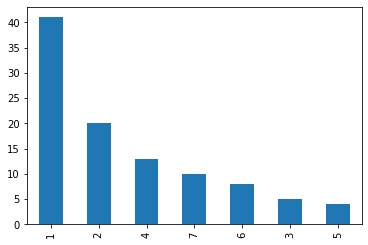

In [12]:
zoo["type"].value_counts().plot.bar()

<Figure size 864x576 with 0 Axes>

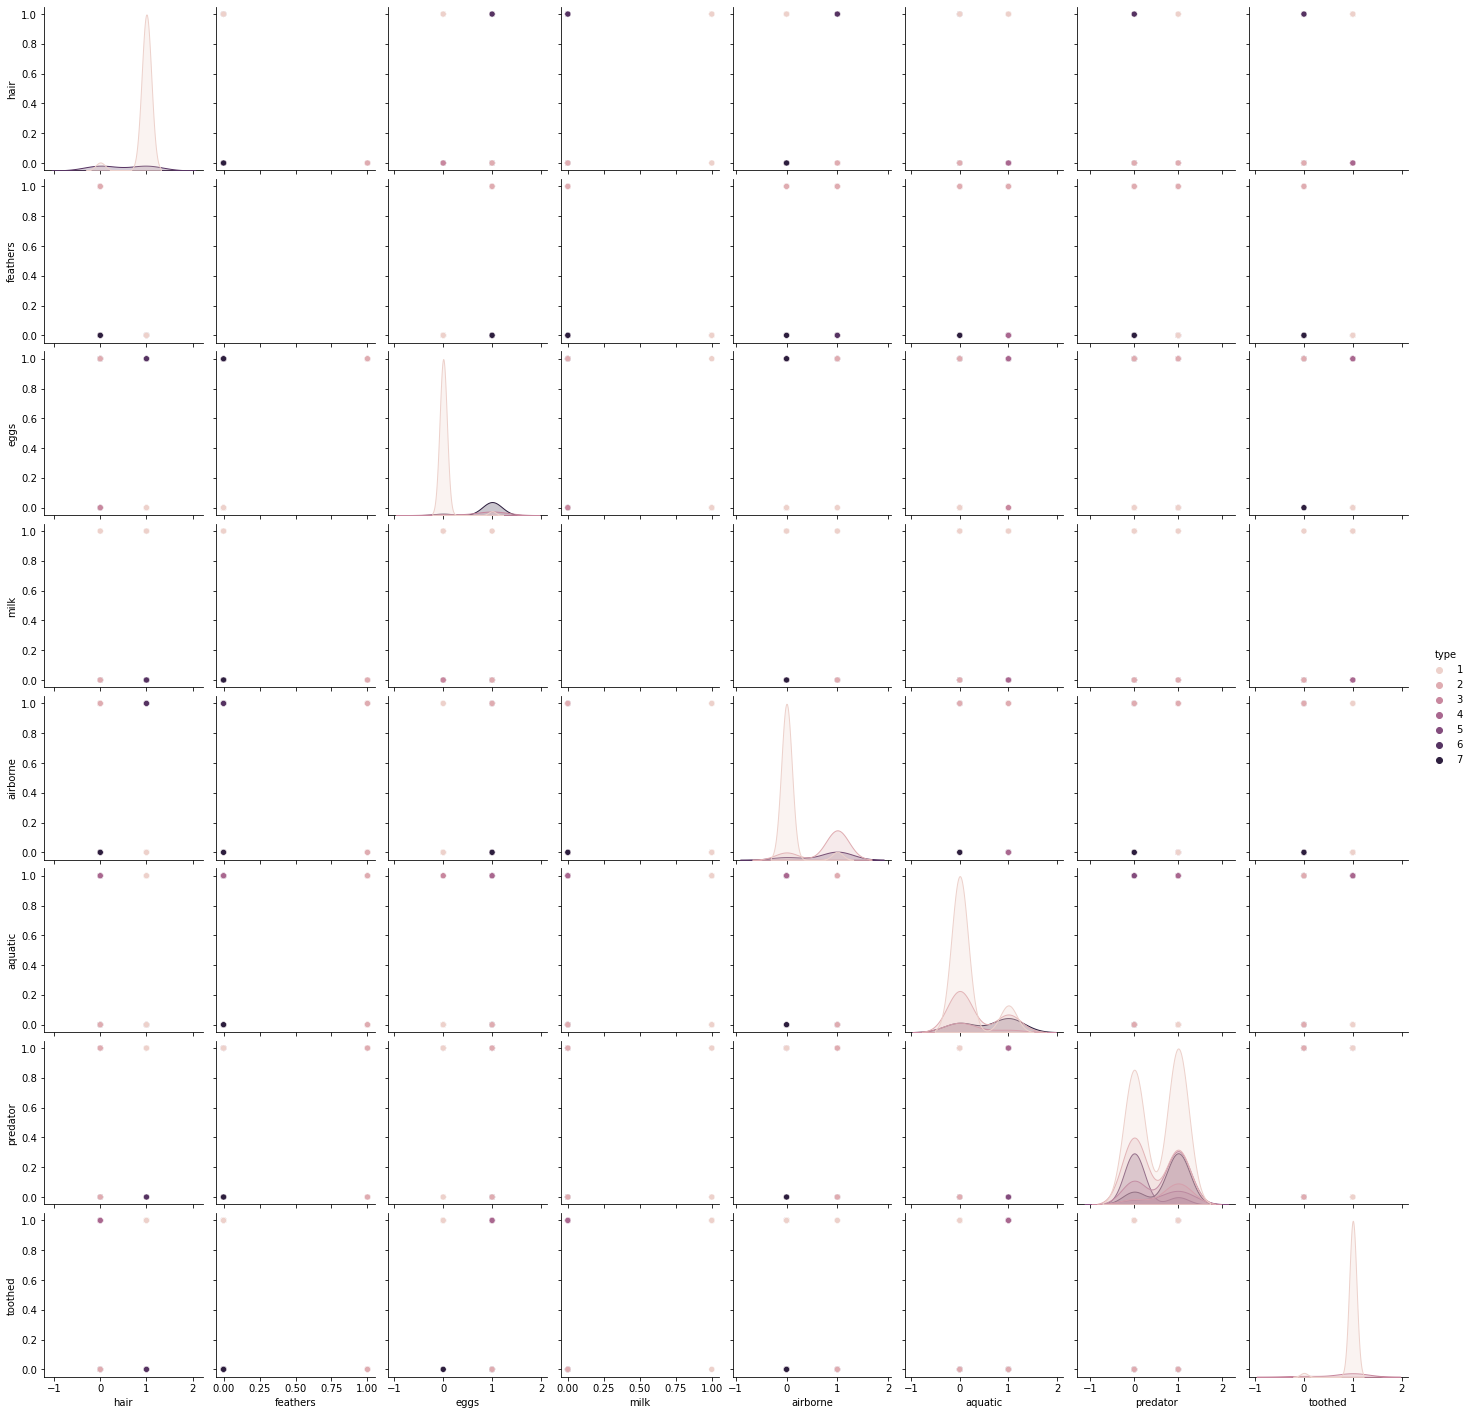

In [13]:
plt.figure(figsize=(12,8))
sns.pairplot(zoo.iloc[:,[0,1,2,3,4,5,6,7,16]],hue='type')
plt.show()

<Figure size 864x576 with 0 Axes>

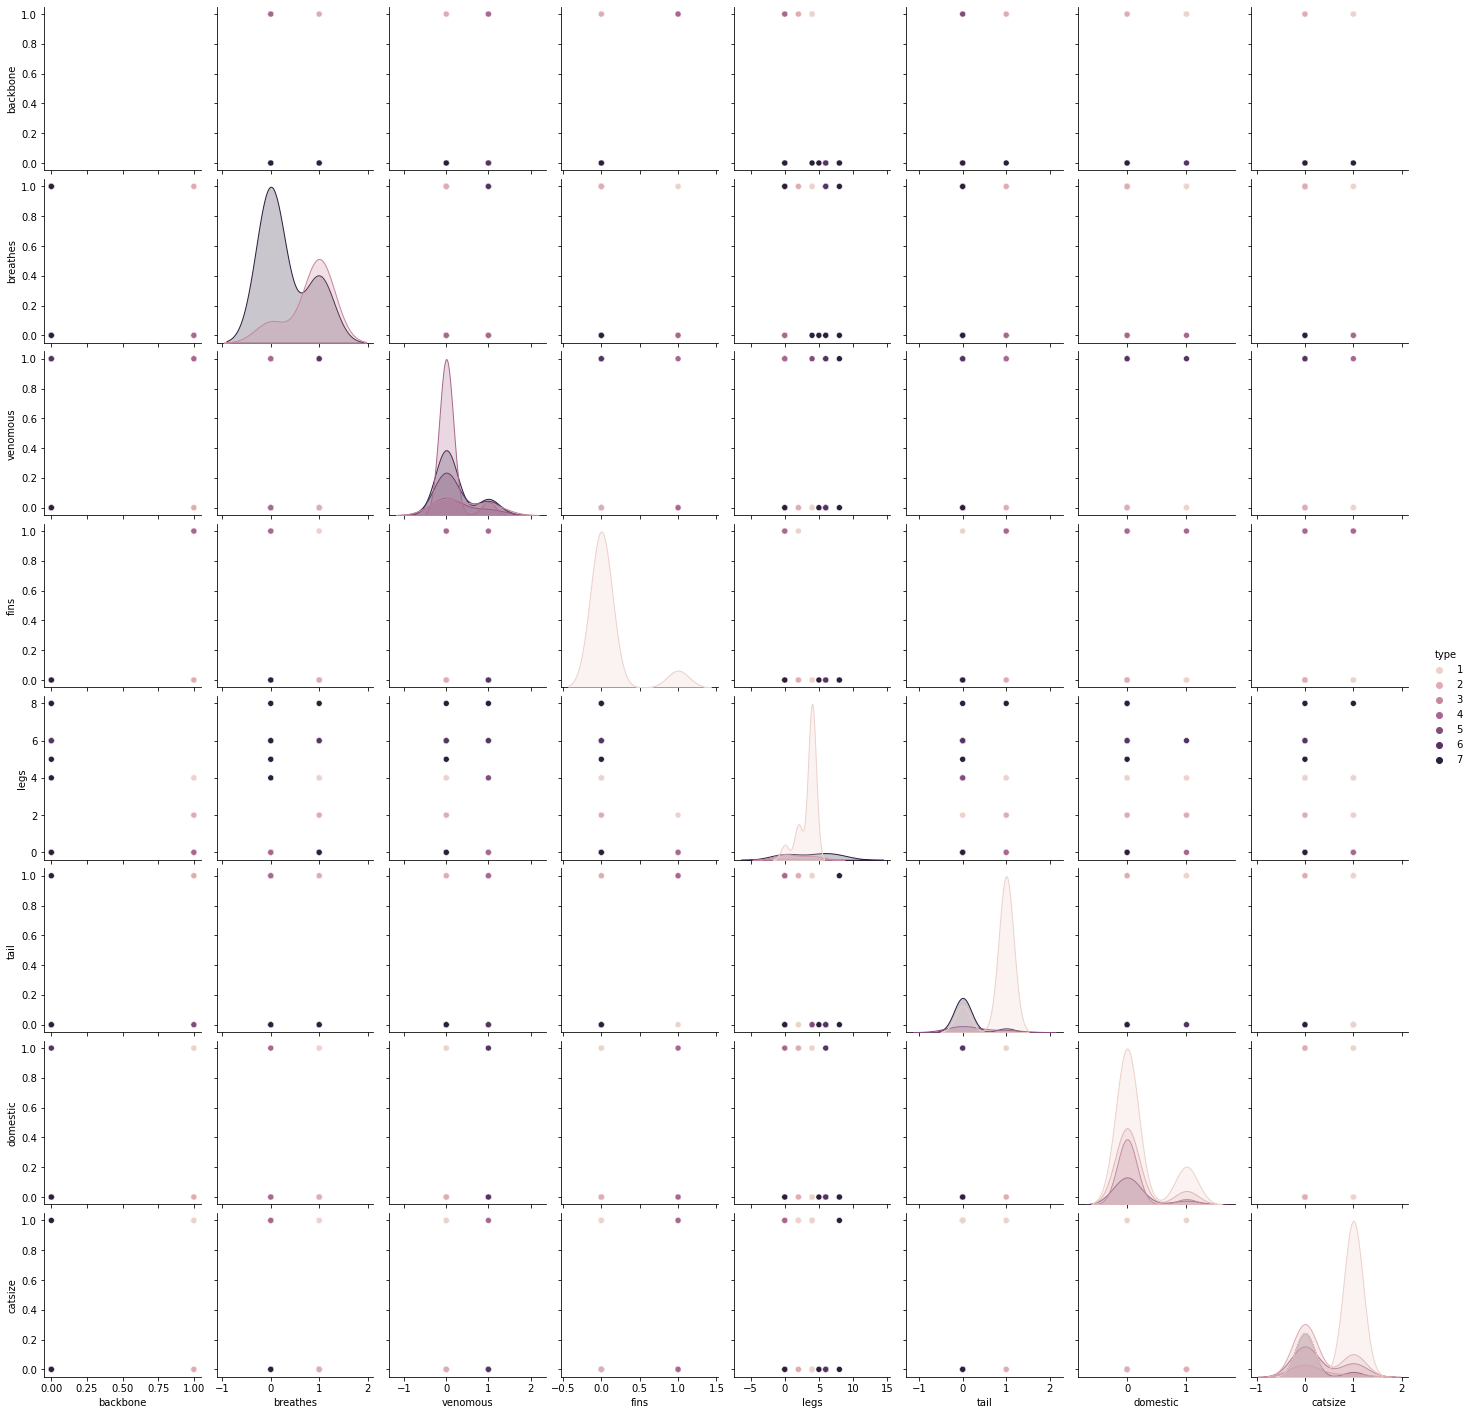

In [14]:
plt.figure(figsize=(12,8))
sns.pairplot(zoo.iloc[:,[8,9,10,11,12,13,14,15,16]],hue='type')
plt.show()

# Split train and test data

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Using KNN

In [16]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
y_pred=knn.predict(X_test)

# Evaluate the KNN model

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score as ac

In [19]:
cf1=confusion_matrix(y_test,y_pred)
cf1

array([[11,  0,  0,  1,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  1,  2,  0]])

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         5
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         6

    accuracy                           0.74        31
   macro avg       0.43      0.56      0.47        31
weighted avg       0.68      0.74      0.69        31



In [21]:
n5=ac(y_test,y_pred)
n5

0.7419354838709677

# Lets choose the best K value

We can do it by 2 methods
 - finding the accuracy rate and threshold 
 - finding the error rate and threshold 

##### Accuracy rate

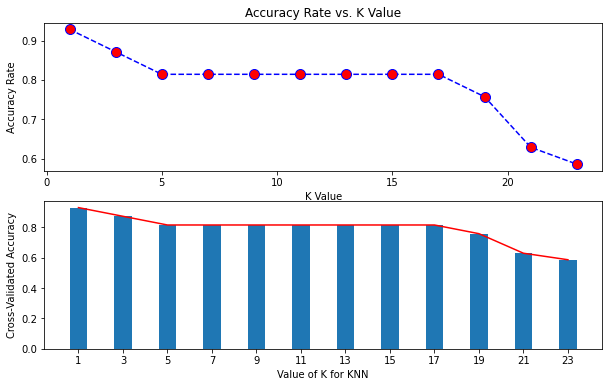

In [22]:
accuracy_rate = []

k_range=[2*i+1 for i in range(0,12)]

for i in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

fig, ax = plt.subplots(2,1,figsize=(10,6) )
    
# first plot  
ax[0].plot(k_range,accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax[0].set_title('Accuracy Rate vs. K Value')
ax[0].set_xlabel('K Value')
ax[0].set_ylabel('Accuracy Rate')


# Second plot 
ax[1].bar(k_range, accuracy_rate)
ax[1].plot(k_range, accuracy_rate,color="red")
ax[1].set_xlabel('Value of K for KNN')
ax[1].set_ylabel('Cross-Validated Accuracy')
ax[1].set_xticks(k_range)
#plt.ylim(0.6,1)
#ax[1].set_ylim(1,3)
plt.show()


In [23]:
accuracy_rate

[0.9285714285714286,
 0.8714285714285716,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.7571428571428571,
 0.6285714285714286,
 0.5857142857142856]

In [24]:
np.argmax(accuracy_rate)

0

In [25]:
k_range[0]

1

##### Error rate

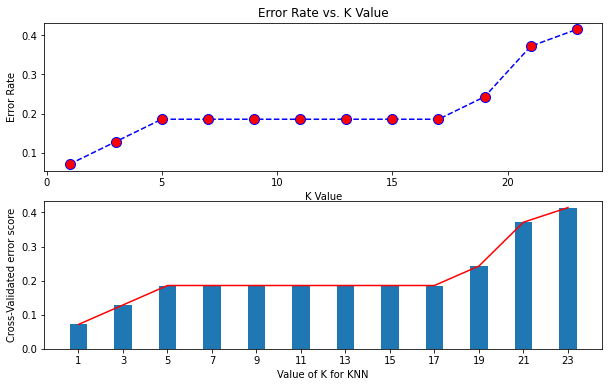

In [26]:
error_rate = []

k_range=[2*i+1 for i in range(0,12)]

for i in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    error_rate.append(1-score.mean())
    

fig, ax = plt.subplots(2,1,figsize=(10,6) )
    
# first plot  

ax[0].plot(k_range,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax[0].set_title('Error Rate vs. K Value')
ax[0].set_xlabel('K Value')
ax[0].set_ylabel('Error Rate')


# Second plot 
ax[1].bar(k_range, error_rate)
ax[1].plot(k_range, error_rate,color="red")
ax[1].set_xlabel('Value of K for KNN')
ax[1].set_ylabel('Cross-Validated error score')
ax[1].set_xticks(k_range)
#plt.ylim(0.6,1)
plt.show()



In [27]:
np.argmin(error_rate)

0

In [28]:
k_range[0]

1

### As we can see the best K value is 1 for the Zoo dataset, validated with both Accuracy and error score
    Now lets change the value to 1 and check with the previous model 

In [29]:
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)

In [30]:
n1=ac(y_test,y_pred1)
n1

0.967741935483871

In [31]:
cf5=confusion_matrix(y_test,y_pred1)
cf5

array([[12,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  5]])

In [32]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       0.50      1.00      0.67         1
           7       1.00      0.83      0.91         6

    accuracy                           0.97        31
   macro avg       0.92      0.97      0.93        31
weighted avg       0.98      0.97      0.97        31



In [33]:
r={'n_neighbours':['n_neigh=1',"n_neigh_5"],
                      'Scores':[n1,n5]
                      }

results=pd.DataFrame(r)
results


,n_neighbours,Scores
0,n_neigh=1,0.967742
1,n_neigh_5,0.741935


### Lets compare the confusion matrix between n=1 and n=5 ( on test data)

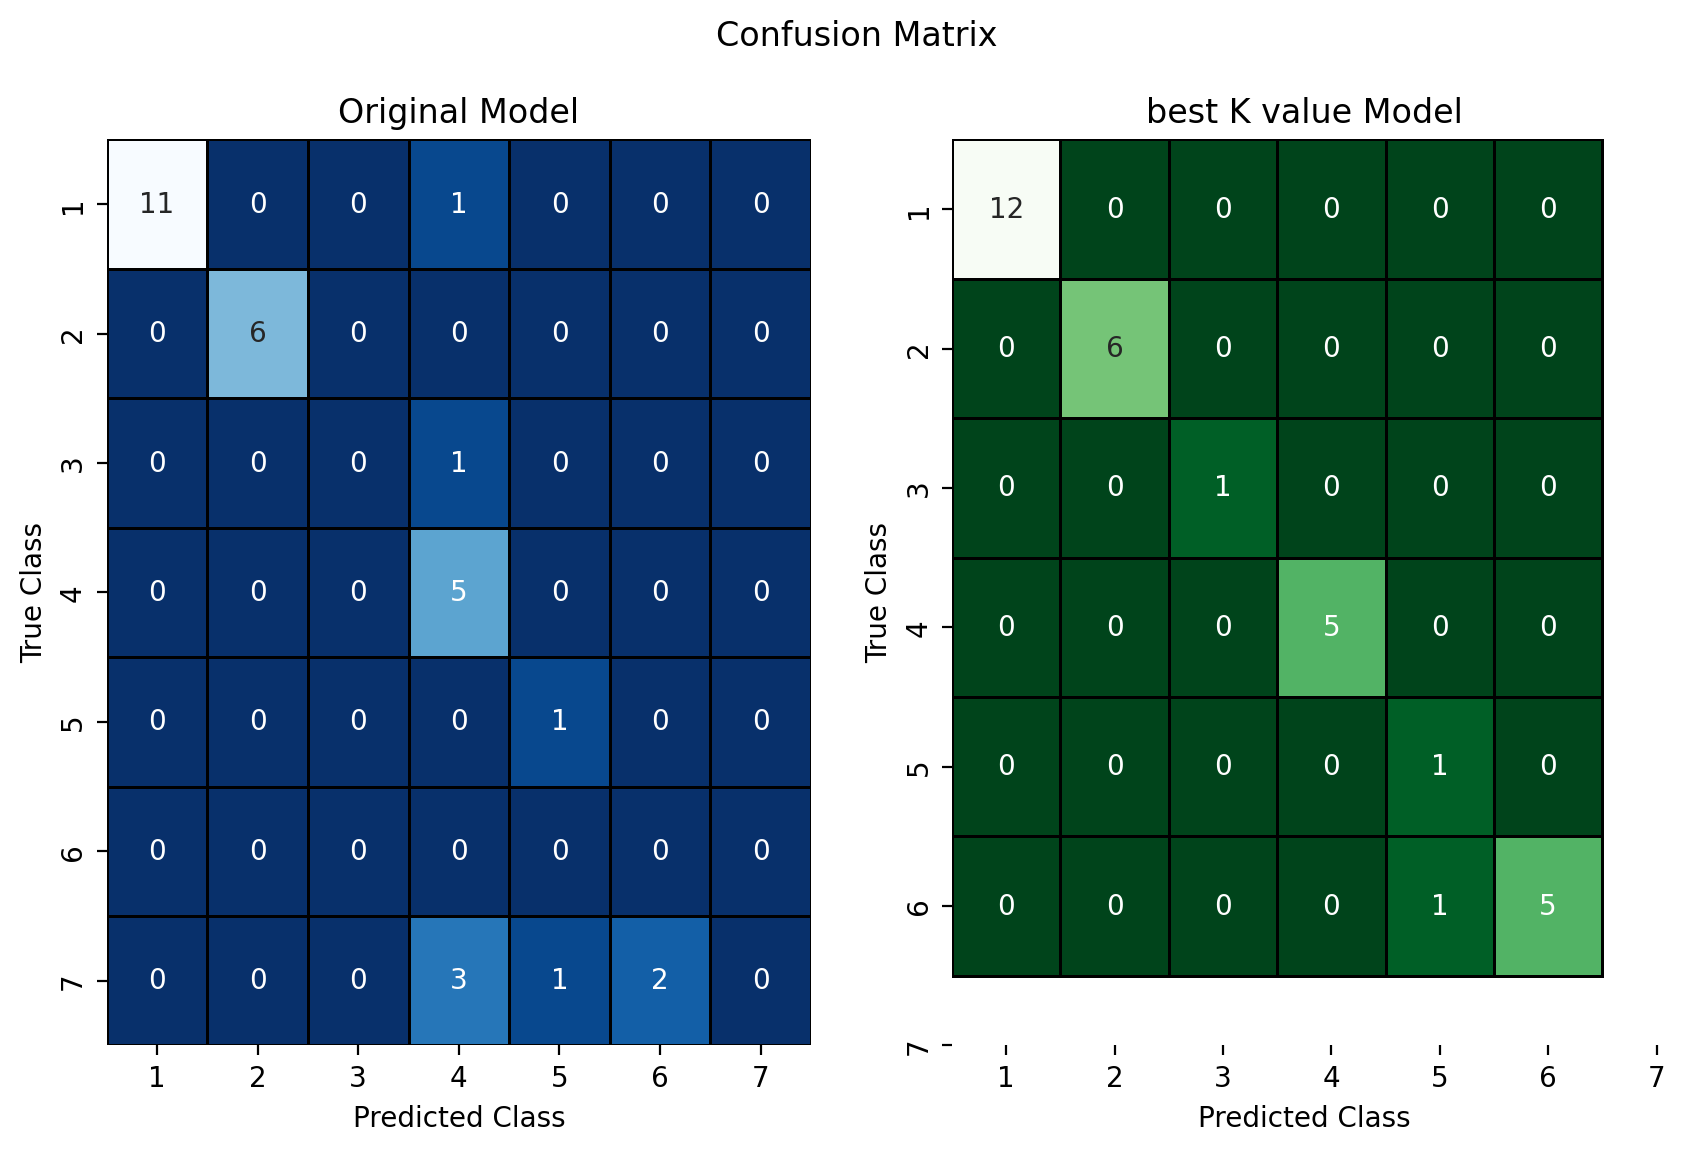

In [36]:
fig, ax= plt.subplots(1,2, figsize=(10,6),dpi=200)

xlabels=[1,2,3,4,5,6,7]
ylabels=[1,2,3,4,5,6,7]

sns.heatmap(cf1,ax=ax[0],annot=True, cbar=None, cmap="Blues_r",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax[0].set_title('Original Model')

sns.heatmap(cf5,ax=ax[1],annot=True, cbar=None, cmap="Greens_r",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax[1].set_title('best K value Model')

ax[0].set_xlabel('Predicted Class')
ax[0].set_ylabel('True Class')

ax[1].set_xlabel('Predicted Class')
ax[1].set_ylabel('True Class')

fig.suptitle("Confusion Matrix")
plt.subplots_adjust(wspace=.2)

plt.show()

# lets compare the train and test accuracy to check the overfitting 

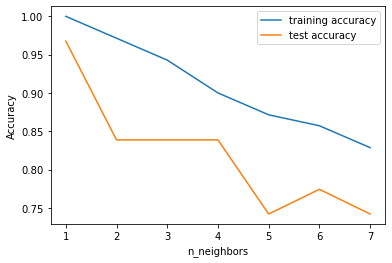

In [35]:
test_accuracy=[]
train_accuracy=[]

for i in range(1,8):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_pred=knn.predict(X_train)
    y_test_pred=knn.predict(X_test)
    tr_accuracy=ac(y_train,y_train_pred)
    te_accuracy=ac(y_test,y_test_pred)
    train_accuracy.append(tr_accuracy)
    test_accuracy.append(te_accuracy)
    
    
plt.plot(range(1,8),train_accuracy,label="training accuracy")
plt.plot(range(1,8),test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")   
plt.legend()
    


### We can see that at n_neighbour=1, the training and testing data scores are close